Привет, меня зовут Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Я буду оставлять комментарии по ходу работы, их можно найти в зеленых, жёлтых и красных ячейках, таких как эти:

<div class="alert alert-block alert-success">
<b>Success:</b> Если все сделано хорошо.</div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Очень важно, чтобы ты сохранила мои комментари без изменений при доработке проекта, а также реагировала на них - описывала изменения в отдельных ячейках, помечая их другим цветом. 
Например так:
<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Графики подписаны
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-success">
<b>Summary:</b> 
    
- Это просто одна из лучших работ на этом српинте. Не считая пары придирок по оформлению, тут и комментировать нечего, молодец) Продолжай в том же духе, удачи в дальнейшем обучении!
</div>

# Оглавление
   [Исследование объявлений о продаже квартир. Введение](#шаг-0)
1. [Шаг 1. Загрузка файла с данными и изучение общей информации](#шаг-1)
2. [Шаг 2. Предобработка данных](#шаг-2)
    1. [Обработка пропусков и приведение данных к нужным типам](#шаг-2-1)
3. [Шаг 3. Расчёты и добавление в таблицу требуемых данных](#шаг-3)
    1. [Добавление цены квадратного метра ](#шаг-3-1)
    2. [Добавление дня недели, месяца и года публикации объявления](#шаг-3-2)
    3. [Добавление этажа квартиры ](#шаг-3-3)
    4. [Добавление вариантов этажей ](#шаг-3-4)
    5. [Добавление соотношения жилой и общей площади, а также отношения площади кухни к общей](#шаг-3-5)
4. [Шаг 4. Проведение исследовательского анализа данных и выполнение инструкций](#шаг-4)
    1. [Изучение параметров: площадь, цена, число комнат, высота потолков.](#шаг-4-1)
    2. [Изучение время продажи квартиры. Построение гистограммы. Расчёт среднего и медианы](#шаг-4-2)
    3. [Факторы, влияющие на стоимость квартиры](#шаг-4-4)
    4. [Выбор 10 населённых пунктов с наибольшим числом объявлений](#шаг-4-5)
5. [Общие выводы](#шаг-5)


<div class="alert alert-block alert-success">
<b>Success:</b> Оглавление это прекрасно :)</div>

## Исследование объявлений о продаже квартир. Введение <a name="шаг-0"></a>

**Целью** данного исследования является определение рыночной стоимости объектов недвижимости и  установление параметров, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

Объект исследования: база данных  сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. База данных представлена для анализа в формате csv и содержит следующие атрибуты:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от
- публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

По каждой квартире на продажу доступны два вида данных: первые вписаны пользователем, вторые — получены автоматически на основе
картографических данных. 

*Пояснение:* апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.


In [83]:
import pandas as pd

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv(r'C:\Users\Larissa Olifirova\Desktop\Яндекс практикум\3.Исследовательский анализ данных\real_estate_data.csv', sep='\t')

<div class="alert alert-block alert-warning">
<b>Remarks:</b> В сообществе python-разработчиков существует такой свод правил 
    <a href="https://www.python.org/dev/peps/pep-0008/">PEP-8.</a>
    Одним из правил хорошего тона при написании кода является расположение всех импортов в начале программы (в первой ячейке с кодом в нашем случае) в алфавитном порядке.
</div>

In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [85]:
df.rename(columns={'cityCenters_nearest':'citycenters_nearest'}, inplace=True) #меняем заглавную букву на строчную

In [86]:
df.columns #проверяем имена столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [87]:
df.sample(10) #смотрим как занесены данные 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10510,18,4200000.0,44.0,2018-02-14T00:00:00,1,2.70,20.0,15.5,20,NaN,...,11.5,NaN,Санкт-Петербург,39141.0,15985.0,0.0,NaN,0.0,NaN,97.0
11735,14,7580000.0,110.0,2017-01-08T00:00:00,5,2.65,5.0,74.8,4,NaN,...,10.6,0.0,посёлок Шушары,17746.0,30888.0,0.0,NaN,0.0,NaN,194.0
10056,20,5400000.0,85.4,2017-11-02T00:00:00,3,NaN,8.0,52.1,4,NaN,...,11.4,NaN,Красное Село,27148.0,30573.0,0.0,NaN,0.0,NaN,57.0
17912,17,135000000.0,166.0,2019-02-07T00:00:00,3,3.30,7.0,52.0,1,NaN,...,64.0,NaN,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,NaN
2177,16,5450000.0,64.0,2018-09-15T00:00:00,3,2.55,9.0,40.0,6,False,...,7.0,2.0,Санкт-Петербург,14371.0,15364.0,0.0,NaN,1.0,100.0,7.0
19167,12,3350000.0,31.0,2018-10-23T00:00:00,1,2.50,5.0,19.0,1,NaN,...,5.5,NaN,Санкт-Петербург,15109.0,7990.0,1.0,455.0,0.0,NaN,14.0
7753,0,700000.0,36.0,2015-08-05T00:00:00,1,NaN,5.0,17.0,1,False,...,8.6,2.0,деревня Фалилеево,NaN,NaN,NaN,NaN,NaN,NaN,392.0
4836,11,5300000.0,68.5,2019-01-26T00:00:00,2,2.70,17.0,31.0,3,NaN,...,13.5,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,31.0
14659,16,8500000.0,83.0,2017-06-04T00:00:00,3,3.00,7.0,49.0,3,False,...,11.0,0.0,Санкт-Петербург,36875.0,8816.0,2.0,269.0,1.0,695.0,146.0
18165,13,4800000.0,44.2,2019-04-12T00:00:00,2,2.60,5.0,28.0,2,NaN,...,5.9,1.0,Санкт-Петербург,15255.0,8137.0,1.0,614.0,0.0,NaN,NaN


In [88]:
df.describe() #вызываем описание таблицы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


 Строим диаграммы "Ящик с усами" для тех данных, по которым видим большие величины стандартных отклонений и где могут скрываться ошибки: total_images, total_area, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area

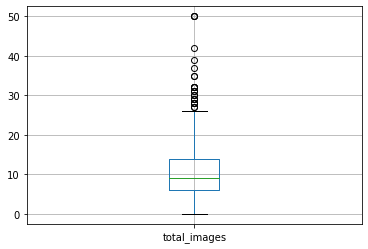

In [89]:
import matplotlib.pyplot as plt
df.boxplot(column='total_images')
plt.show()

Здесь явно видны выбросы. Кроме того, по правилам Яндекс к объявлению можно прикрепить не более 30 фотографий.

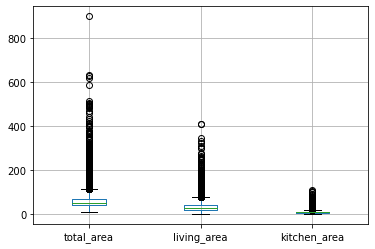

In [90]:
df.boxplot(column=['total_area', 'living_area', 'kitchen_area'])
plt.show()

В процессе предобработки данных изучим всплеск по total_area

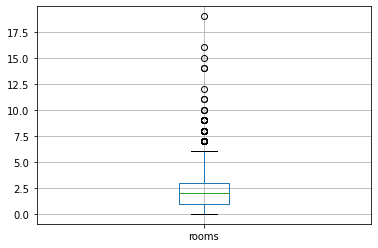

In [91]:
df.boxplot(column='rooms')
plt.show()

Очень большие всплески по количеству комнат выше 12 единиц.

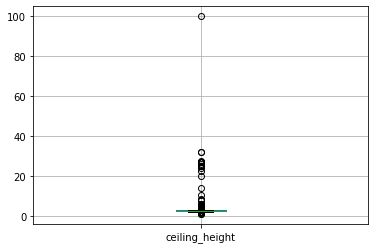

In [92]:
df.boxplot(column='ceiling_height')
plt.show()

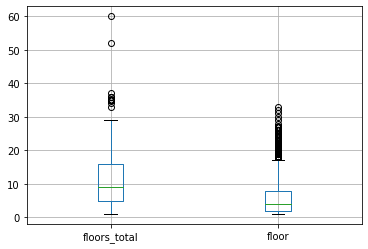

In [93]:
df.boxplot(column=['floors_total', 'floor']) #смотрим выбросы по этажности
plt.show()

Согласно диаграмме floors_total содержат значения более 50. 

### Вывод

- Данные содержат 22 колонки и 23699 строк.
- Требуется замена типа данных в first_day_exposition  с object в datatype.
- Также следует заменить тип данные с float на integer в столбце floors_total.          
- В полученных данных большое количество пропущенных значений, часть из которых предстоит заполнить.
- В данных total_images есть явные выбросы, которые следует проанализировать.
- Из описания следует, что ряд столбцов содержит артефактные значения: очень высокие значения максимума ceiling_height и   floors_total (если это не Лахта-центр). Также обнаружено нереалистичное значение минимума в ceiling_height. 

<div class="alert alert-block alert-success">
<b>Success:</b> Глубокая аналитика</div>

## Шаг 2. Предобработка данных <a name="шаг-2"></a>

### Обработка пропусков и приведение данных к нужным типам   <a name="шаг-2-1"></a>

In [94]:
df.isna().mean() #проверяем, где содержатся пропуски и с какой долей

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
citycenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Данные содержат достаточно большое число пропусков. В столбце is_apartment пропущено порядка 88% данных. Данных о близлежащих  парках и прудах нет в 66% и 62% случаев соответственно.

*last_price*

In [95]:
df['last_price'] = df['last_price']/1000000 #приводим стоимость к миллионам

*total_images*

В столбце нет пропущенных значений, но необходимо устранить выбросы, которые были обнаружены при построении боксплота.

In [96]:
df.query('total_images >30').sort_values(by='total_images') #размещение более 30 фотографий запрещено правилами

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5349,31,11.990,92.5,2017-12-07T00:00:00,3,NaN,25.0,51.4,22,NaN,...,15.0,1.0,Санкт-Петербург,30546.0,11209.0,1.0,433.0,1.0,700.0,47.0
22517,31,9.000,82.6,2018-02-22T00:00:00,3,3.0,5.0,52.7,5,NaN,...,9.0,NaN,Санкт-Петербург,28576.0,7121.0,2.0,91.0,1.0,691.0,95.0
99,32,9.600,90.0,2017-09-26T00:00:00,4,NaN,5.0,67.0,2,NaN,...,8.0,NaN,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0
7393,32,8.290,113.2,2017-04-28T00:00:00,4,NaN,6.0,70.4,4,NaN,...,10.4,NaN,Санкт-Петербург,24177.0,2342.0,2.0,356.0,3.0,457.0,225.0
7938,32,17.000,150.0,2017-09-26T00:00:00,3,3.5,6.0,99.3,4,NaN,...,16.0,NaN,Санкт-Петербург,24980.0,3555.0,0.0,NaN,0.0,NaN,165.0
21076,32,8.300,84.7,2017-11-11T00:00:00,3,NaN,14.0,49.9,3,NaN,...,11.3,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
308,35,5.700,83.9,2018-02-01T00:00:00,3,2.6,5.0,51.8,2,NaN,...,9.6,NaN,Красное Село,27245.0,30670.0,0.0,NaN,0.0,NaN,47.0
10523,35,17.000,90.0,2017-11-10T00:00:00,3,NaN,16.0,52.0,6,NaN,...,14.0,4.0,Санкт-Петербург,30215.0,6255.0,0.0,NaN,1.0,113.0,35.0
21199,37,11.500,65.7,2018-02-01T00:00:00,2,NaN,25.0,23.0,10,NaN,...,21.0,2.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,64.0
1058,39,1.900,63.0,2017-09-29T00:00:00,3,NaN,5.0,44.2,5,NaN,...,6.3,1.0,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,106.0


In [97]:
df['total_images'] = df['total_images'].replace([31, 32, 35, 37, 39, 42, 50], 30) #заменим все показатели >30 на 30

*total_area*

In [98]:
df.query('total_area >500').sort_values(by='total_area') #смотрим на выбросы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8018,20,84.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
4237,1,50.0,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Данные похожи на истинные, поэтому не будем избавляться от этих строк.

*rooms*

In [99]:
df.query('rooms >10').sort_values(by='rooms') #по количеству комнат смотрим на выбросы более 10 единиц

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17.500,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,...,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
9688,8,33.000,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,...,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
19540,8,420.000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
866,5,25.000,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28.659,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,NaN,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
5358,20,65.000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
18848,6,28.500,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
14498,6,32.250,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


Анализ результатов позволяет говорить о большинстве предложений в списке, что это возможно бывшие комммунальные квартиры: близость к центру и относительно невысокая стоимость за квадратный метр. Данные также не будем рассматривать в качестве выбросов. 

*ceiling_height*

Большая доля пропусков в столбце ceiling_height - 39%. Попробуем заменить значения на аналогичные для коррелирующих групп. Посмотрим, с чем коррелирует высота потолков:

In [100]:
df.corr().head(5) #пяти строк достаточно для визуального анализа корреируемости ceiling_height

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104365,0.115016,0.098917,-0.002238,0.009946,0.104302,0.030889,-0.029352,-0.024459,0.103863,0.120701,-0.002223,-0.047522,0.021602,-0.008399,-0.011382,-0.003055,-0.026301
last_price,0.104365,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115016,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.098917,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.002238,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091


Чёткой корреляции нет, поэтому заполнять пустые значения необходимо средним или медианным значением

Но сначала устраним существенные пики в высоте потолков, такие как 100 или 30 метров:

In [101]:
df.query('ceiling_height > 10 or ceiling_height < 2') #определим, какая недвижимость представлена выстой потолков более 10 метров.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3.600,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2.900,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4.300,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,NaN,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3.000,25.0,2017-09-27T00:00:00,0,27.00,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3.850,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2.500,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,NaN,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4.400,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,NaN,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1.500,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8.150,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3.300,44.4,2019-03-25T00:00:00,2,25.00,5.0,31.3,5,NaN,...,5.70,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN


Отмечаем явную опечатку в виде перемещения запятой или добавление лишнего нуля. 

In [102]:
df['ceiling_height'] = df['ceiling_height'].replace([1, 1.2, 1.75, 10.3, 14, 20, 22.6, 24, 25, 26, 27, 27.5, 28, 32, 100], 
                                                        [2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 2.8, 3.2, 2.7]) 
#заменим всплески вручную. 

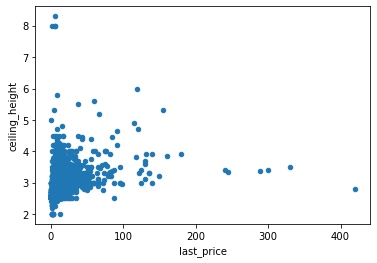

In [103]:
df.plot(x='last_price', y= 'ceiling_height', kind='scatter'); 
#экстремальных значений таких как 1, 20 или 100 не осталось

In [104]:
df.corr().head(5) #смотрим, как теперь коррелируют данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104365,0.115016,0.098917,0.044123,0.009946,0.104302,0.030889,-0.029352,-0.024459,0.103863,0.120701,-0.002223,-0.047522,0.021602,-0.008399,-0.011382,-0.003055,-0.026301
last_price,0.104365,1.000000,0.653675,0.363343,0.379127,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115016,0.653675,1.000000,0.758344,0.457969,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.098917,0.363343,0.758344,1.000000,0.280616,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,0.044123,0.379127,0.457969,0.280616,1.000000,-0.089714,0.435809,-0.045710,0.018055,0.010991,0.400938,-0.078390,-0.102373,-0.349825,0.259572,-0.055488,0.225714,-0.136641,0.125381


Теперь total_area, living_area  и kitchen_area показывают наибольшую взаимосвязь с  ceiling_height. Произведём замену пустых значений  ceiling_height на основе этой взаимосвязи:

In [105]:
#df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['total_area', 'living_area', 'kitchen_area'])['ceiling_height'].transform('median'))

In [106]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('total_area')['ceiling_height'].transform('median'))

In [107]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('living_area')['ceiling_height'].transform('median'))

In [108]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('kitchen_area')['ceiling_height'].transform('median'))

*floors_total*

Общее количество этажей  floors_total тоже имеет пропущенные значения, которые заменим на значения из указанного этажа выставленной недвижимости floor. Для этого переведём floors_total в формат integer, предварительно заменив все пропуски нулями

In [109]:
import numpy as np
df['floors_total'] =  df['floors_total'].fillna(0) 
df['floors_total'] = df['floors_total'].astype(np.int64)    

In [110]:
df['floors_total'] =  df['floors_total'].replace(0, df['floor'])

In [111]:
df['floors_total'].value_counts(dropna=False) #проверяем замену

5     5792
9     3766
16    1376
12    1368
4     1210
10    1177
25    1075
6      923
17     834
3      672
7      596
14     555
18     508
24     471
8      398
2      385
15     368
23     353
19     342
22     287
20     273
13     232
11     206
27     164
21     162
26     124
1       28
35      24
28      21
36       3
29       1
37       1
34       1
60       1
33       1
52       1
Name: floors_total, dtype: int64

Смотрим на два значения 60 и 52 этажа:

In [112]:
df.query('floors_total >=50').sort_values(by='total_images')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3.978,40.0,2018-09-24T00:00:00,1,2.65,52,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
2253,12,3.800,45.5,2018-06-28T00:00:00,2,2.88,60,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


Поменяем floors_total для 52 и 60 этажей на floor 18  и 4 из этих же объявлений:

In [113]:
df['floors_total'] = df['floors_total'].replace([52, 60], [18, 4]) 

*living_area*

Замену NaN в столбце living_area произведём на ноль, т.к. отсутствующие значения показывают, что помещение не является жилым. 

In [114]:
df['living_area'] =  df['living_area'].fillna(0)

*is_apartment*

Столбец is_apartment содержит очень большое количество пропущенных значений, но осуществлять замену будет некорректным. Столбец служит как дополнительный ориентир при оценки других параметров. По этой же причине не будем менять тип object на булевый.

*kitchen_area*

В столбце kitchen_area пропущено 2278 значений. Предположим, что это студии:

In [115]:
df.query('kitchen_area == "NaN" or studio ==True') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64.900000,159.0,2015-07-24T00:00:00,3,3.14,14,0.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2.200000,32.8,2018-02-19T00:00:00,1,2.53,9,0.0,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1.990000,45.8,2017-10-28T00:00:00,2,2.50,5,0.0,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5.350000,40.0,2018-11-18T00:00:00,1,2.70,22,0.0,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6.300000,46.5,2017-03-06T00:00:00,1,2.60,13,0.0,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2.414306,40.5,2016-09-08T00:00:00,1,2.56,18,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6.400000,88.0,2018-01-12T00:00:00,4,2.55,10,0.0,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2.450000,45.6,2018-02-08T00:00:00,1,2.80,9,0.0,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2.500000,35.0,2017-12-08T00:00:00,1,2.60,9,0.0,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В kitchen_area пропущены значения именно по студиям, поэтому можем присвоить им ноль: 

In [116]:
df['kitchen_area'] =  df['kitchen_area'].fillna(0)

*balcony*

Данные по балконам также имеют ряд пропусков. 

In [117]:
df['balcony'].value_counts(dropna=False)


NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [118]:
#заменим пропуски на 99 для перевода целочисленный формат, т.к. нули уже есть
df['balcony'] =  df['balcony'].fillna(99) 
df['balcony'] = df['balcony'].astype(np.int64) #меняем тип данных    

In [119]:
df[(df['balcony'] == 5) & (df['total_area'] <=80)].sample(10) 
#проверим, какие относительно нrepla

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22332,6,5.830583,52.2,2018-12-30T00:00:00,1,3.00,4,0.0,3,NaN,...,11.93,5,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,60.0
21901,19,6.750000,70.2,2018-08-11T00:00:00,3,2.65,12,44.4,10,False,...,8.30,5,Санкт-Петербург,31552.0,12062.0,0.0,NaN,0.0,NaN,NaN
13204,14,5.000000,79.2,2019-01-22T00:00:00,4,2.65,9,55.2,7,NaN,...,9.80,5,посёлок городского типа Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19081,8,7.240000,60.0,2018-11-02T00:00:00,2,2.55,10,32.0,7,NaN,...,8.40,5,Санкт-Петербург,43803.0,10584.0,2.0,519.0,0.0,NaN,NaN
4082,7,4.690000,58.3,2018-04-03T00:00:00,3,2.50,9,39.5,2,NaN,...,6.40,5,Санкт-Петербург,49847.0,15702.0,1.0,483.0,0.0,NaN,90.0
16319,20,8.810000,67.0,2018-10-15T00:00:00,2,2.70,16,28.3,11,NaN,...,9.70,5,Санкт-Петербург,28684.0,11638.0,0.0,NaN,1.0,362.0,67.0
8678,5,4.300000,45.0,2018-04-04T00:00:00,2,2.70,19,24.0,6,NaN,...,9.00,5,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,191.0
7411,4,10.690000,70.0,2019-02-21T00:00:00,2,2.80,17,29.3,14,NaN,...,17.80,5,Санкт-Петербург,44151.0,13731.0,1.0,633.0,0.0,NaN,58.0
15152,9,10.200000,70.6,2018-11-14T00:00:00,2,3.10,17,42.3,7,NaN,...,11.60,5,Санкт-Петербург,9273.0,11391.0,1.0,531.0,1.0,935.0,103.0
409,5,6.600000,73.0,2017-08-15T00:00:00,3,2.67,18,45.0,5,NaN,...,12.00,5,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,10.0


Вероятно, в столбце balcony в данных закралась ошибка: пять балконов в однокомнатной квартире с площадью 25 квадратных метров- это уникальное явление.
Возможно, стоит заменить некорректные значения на медианные по группам на основе метража или количества комнат. Посмотрим корреляцию: 

In [120]:
df.corr().head(12) 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104365,0.115016,0.098917,0.065591,0.010588,0.129816,0.030889,-0.029352,-0.024459,0.135173,0.036520,-0.002223,-0.047522,0.021602,-0.008399,-0.011382,-0.003055,-0.026301
last_price,0.104365,1.000000,0.653675,0.363343,0.348817,-0.006865,0.490706,0.026576,-0.025362,-0.008802,0.386444,0.015771,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115016,0.653675,1.000000,0.758344,0.501449,-0.075527,0.791720,-0.024754,-0.072653,-0.034885,0.514270,0.027310,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.098917,0.363343,0.758344,1.000000,0.335709,-0.227434,0.744691,-0.150862,-0.147286,-0.087500,0.256087,0.042649,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,0.065591,0.348817,0.501449,0.335709,1.000000,-0.071151,0.420980,-0.035915,0.005523,-0.004915,0.338637,0.053179,-0.079211,-0.303528,0.225039,-0.047024,0.203649,-0.108560,0.121983
floors_total,0.010588,-0.006865,-0.075527,-0.227434,-0.071151,1.000000,-0.152541,0.679041,0.069705,0.050859,0.116178,-0.099626,0.105873,0.017438,-0.254089,0.097662,-0.124160,0.038847,-0.052493
living_area,0.129816,0.490706,0.791720,0.744691,0.420980,-0.152541,1.000000,-0.085570,-0.048086,-0.029197,0.461090,-0.022958,-0.054739,-0.201246,0.162529,-0.055604,0.125411,-0.067572,0.150110
floor,0.030889,0.026576,-0.024754,-0.150862,-0.035915,0.679041,-0.085570,1.000000,0.036940,0.035824,0.101389,-0.113166,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029352,-0.025362,-0.072653,-0.147286,0.005523,0.069705,-0.048086,0.036940,1.000000,-0.004235,-0.118354,-0.015017,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024459,-0.008802,-0.034885,-0.087500,-0.004915,0.050859,-0.029197,0.035824,-0.004235,1.000000,-0.079227,-0.030832,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


На основе коэффициентов корреляции, ни один из которых не превышает даже 0,2, откуда  делаем вывод, что заполнить количество пустых строк в balcony на основе зависимых значений невозможно. Поэтому оставляем наше значение 99.

*first_day_exposition*

Для более удобного анализа данных во времени необходимо перевести данные  first_day_exposition  из object в формат datetime: 

In [121]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y/%m/%d')

df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

*Данные о парках и прудах*

In [122]:
# Конвертируем метры в километры
df['airports_nearest'] = df['airports_nearest'] / 1000
df['citycenters_nearest'] = df['citycenters_nearest'] / 1000
df['parks_nearest'] = df['parks_nearest'] / 1000
df['ponds_nearest'] = df['ponds_nearest'] / 1000

Классифицируем расстояние от ценра города. Примем в качестве точки отсчёта Дворцовую площадь (Яндекс также выдаёт в качестве центра города Дворцовую площадь) и введём свою классификацию.

- Расстояние от **0 до 3 км** - Центр. В качестве критерия принято расстояние от Дворцовой до Обводного канала. Сюда войдут восточная часть Васильевского острова, большая часть Петроградки, Финляндский вокзал и Площадь Восстания.

- Расстояние от **3 до 6 км** - Серый пояс, площади, где расположены промышленные предприятия, основанные в 18-20 веках. Здесь чаще всего можно встретить лофты с высокими потолками и огромной общей площадью. Также в эту категорию входит территория Крестовского острова, где размещаются наиболее дорогие и элитные объекты жилой недвижимости.

- Расстояние от **6 до 12 км** - КАД. Основной радиус ограничивается Кольцевой автомобильной дорогой.

- Расстояние **более 12 км** - ЛО. Условно это расстояние можно считать Ленинградской областью.

In [123]:
def distance_options(row):
    if row['citycenters_nearest'] > 12:
        return 'более 12 км'
    elif row['citycenters_nearest'] >6 <= 12:
        return '6 - 12 км'
    elif row['citycenters_nearest'] >3 <= 6:
        return '3 - 6 км'
    else:
        return '0 - 3 км'

df['distfnce_from_center'] = df.apply(distance_options, axis=1) #создаём для категорий столбец

<div class="alert alert-block alert-success">
<b>Success:</b> Отличное применение apply и собственной функции</div>

*days_exposition*

In [124]:
df['days_exposition'].value_counts(dropna=False)

NaN       3181
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1355.0       1
873.0        1
730.0        1
976.0        1
773.0        1
Name: days_exposition, Length: 1142, dtype: int64

Мы не знаем каковы причины отсутствия данных в некоторых стрках days_exposition. Предположим, что значение NaN было выставлено для той недвижимости, которая была продана мгновенно, но замену на ноль производить не будем - это серъёзно повлияет на медианные и  средние значения

### Вывод

- Пропуски в столбце ceiling_height заполнены на основе корреляции значений площадям помещений - общей, жилой и площади кухни.  Высота потолков содержала аномальные значения более 10 метров. Анализ показал, что при внесении данных были допущены ошибки и запятые сместились.
- Пропуски в столбце floors_total заполнены на основе  значений этажа, где размещена недвижимость.
- В столбце living_area пропущенные значения заменены на ноль, т.к. отсутствие значений показывают, что помещение не является жилым.
- Пропуски по столбцу kitchen_area были заменены на ноль, именно пропущенные значения соответствовали значениям studio =True. 
- Пропуски в столбце по количеству балконов заменены на 99 т.к. ноль уже обозначен. В столбце балконы встречаются аномальные значения: 5 балконов для помещений 25 кв.м. Устранить эту аномалию заменой на ноль или 1 нельзя. 
- Даты переведены из object в формат datetime.
- Данные is_apartment, где пропущено порядка 88% данных не подверглись никаким изменениям, т.к. корректно заменить невозможно и  параметр будет служить для уточнения значений других столбцов. 
- Расстояния в метрах были конвертированы в километры. Расстояниям от центра были присвоены категории. 

<div class="alert alert-block alert-success">
<b>Success:</b> Очень качественная предобработка данных</div>

## Шаг 3. Расчёты и добавление  в таблицу требуемых данных <a name="шаг-3"></a>

### Добавление цены квадратного метра <a name="шаг-3-1"></a>

In [125]:
df['price_for_meter'] = df['last_price']/df['total_area'] #сформирован новый столбец

### Добавление дня  недели, месяца и года публикации объявления <a name="шаг-3-2"></a>

Формируем новые столбцы с указанием дня недели публикации объявления (0 -понедельник, 6 - воскресенье), месяца и года публикации с помощью  DatetimeIndex и атрибутов dayofweek, month, year.

In [126]:
df['day_of_week']= pd.DatetimeIndex(df['first_day_exposition']).dayofweek #получаем столбец с днями недели

In [127]:
df['month']= pd.DatetimeIndex(df['first_day_exposition']).month #получаем столбец с месяцами

In [128]:
df['year']= pd.DatetimeIndex(df['first_day_exposition']).year #получаем отдельный столбец с годами

### Добавление вариантов этажей  <a name="шаг-3-4"></a>

Необходимо классифицировать этаж по трём категориям: первый этаж, последний этаж, другой. Также имеем ввиду, что столбец содержит пустые строки. Для этого воспользуемся функцией:

In [129]:
def floor_options(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_options'] = df.apply(floor_options, axis=1) #создаём для категорий столбец


In [130]:
df.sample(10) #проверяем, правильно ли распределились данные по категориям

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distfnce_from_center,price_for_meter,day_of_week,month,year,floor_options
7350,1,15.000000,84.40,2015-11-25,2,2.75,5,47.00,2,False,...,0.611,0.0,NaN,447.0,3 - 6 км,0.177725,2,11,2015,другой
6201,11,2.790000,53.20,2019-04-23,2,2.53,5,31.00,4,NaN,...,NaN,NaN,NaN,NaN,0 - 3 км,0.052444,1,4,2019,другой
21614,1,8.931645,70.50,2015-03-09,2,3.10,16,34.32,5,NaN,...,0.456,2.0,0.454,484.0,6 - 12 км,0.126690,0,3,2015,другой
9135,16,5.800000,40.00,2019-01-29,1,2.75,25,19.90,12,NaN,...,0.082,0.0,NaN,30.0,более 12 км,0.145000,1,1,2019,другой
2933,7,3.400000,52.80,2017-09-29,2,2.50,5,29.80,2,NaN,...,NaN,NaN,NaN,34.0,0 - 3 км,0.064394,4,9,2017,другой
11577,14,4.200000,38.00,2018-12-15,1,2.68,16,20.00,2,False,...,NaN,1.0,1.219,NaN,6 - 12 км,0.110526,5,12,2018,другой
19687,6,3.800000,45.00,2018-01-05,2,2.55,5,0.00,3,NaN,...,NaN,0.0,NaN,45.0,более 12 км,0.084444,4,1,2018,другой
20395,7,1.400000,30.00,2018-07-17,1,2.50,5,0.00,5,NaN,...,NaN,NaN,NaN,45.0,0 - 3 км,0.046667,1,7,2018,последний
5682,20,3.000000,30.53,2016-09-29,1,2.60,9,15.05,7,NaN,...,0.097,0.0,NaN,655.0,6 - 12 км,0.098264,3,9,2016,другой
5808,12,4.590000,43.00,2018-10-19,1,2.60,35,14.00,11,NaN,...,NaN,3.0,0.080,82.0,более 12 км,0.106744,4,10,2018,другой


### Добавление соотношения жилой и общей площади, а также отношения площади кухни к общей <a name="шаг-3-5"></a>

Добавляем столбец соотношения жилой и общей площади, где показатель будет отражать долю жилой площади в общей:

In [131]:
df['living_area_to_total'] = df['living_area']/df['total_area']

Соотношение площади кухни и общей площади добавим в следующий столбец:

In [132]:
df['kitchen_area_to_total'] = df['kitchen_area']/df['total_area']

In [133]:
df 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,distfnce_from_center,price_for_meter,day_of_week,month,year,floor_options,living_area_to_total,kitchen_area_to_total
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,0.755,NaN,более 12 км,0.120370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.40,2018-12-04,1,2.70,11,18.6,1,NaN,...,NaN,81.0,более 12 км,0.082921,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.00,2015-08-20,2,2.60,5,34.3,4,NaN,...,0.574,558.0,более 12 км,0.092786,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.00,2015-07-24,3,3.14,14,0.0,9,NaN,...,0.234,424.0,6 - 12 км,0.408176,4,7,2015,другой,0.000000,0.000000
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,0.048,121.0,6 - 12 км,0.100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.700,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,0.381,NaN,3 - 6 км,0.072491,1,3,2017,другой,0.547792,0.103356
23695,14,3.100,59.00,2018-01-15,3,2.57,5,38.0,4,NaN,...,NaN,45.0,0 - 3 км,0.052542,0,1,2018,другой,0.644068,0.144068
23696,18,2.500,56.70,2018-02-11,2,2.67,3,29.7,1,NaN,...,NaN,NaN,0 - 3 км,0.044092,6,2,2018,первый,0.523810,0.000000
23697,13,11.475,76.75,2017-03-28,2,3.00,17,0.0,12,NaN,...,0.196,602.0,6 - 12 км,0.149511,1,3,2017,другой,0.000000,0.303583


## Шаг 4. Проведение исследовательского анализа данных и выполнение инструкций <a name="шаг-4"></a>

### Изучение параметров: площадь, цена, число комнат, высота потолков.  <a name="шаг-4-1"></a>

Создадим новый датафрейм, куда войдут все требуемые значения: total_area, living_area, kitchen_area, last_price, rooms, ceiling_height.

In [134]:
df1 = df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']]

In [135]:
df1

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
0,108.00,51.0,25.00,13.000,3,2.70
1,40.40,18.6,11.00,3.350,1,2.70
2,56.00,34.3,8.30,5.196,2,2.60
3,159.00,0.0,0.00,64.900,3,3.14
4,100.00,32.0,41.00,10.000,2,3.03
...,...,...,...,...,...,...
23694,133.81,73.3,13.83,9.700,3,3.70
23695,59.00,38.0,8.50,3.100,3,2.57
23696,56.70,29.7,0.00,2.500,2,2.67
23697,76.75,0.0,23.30,11.475,2,3.00


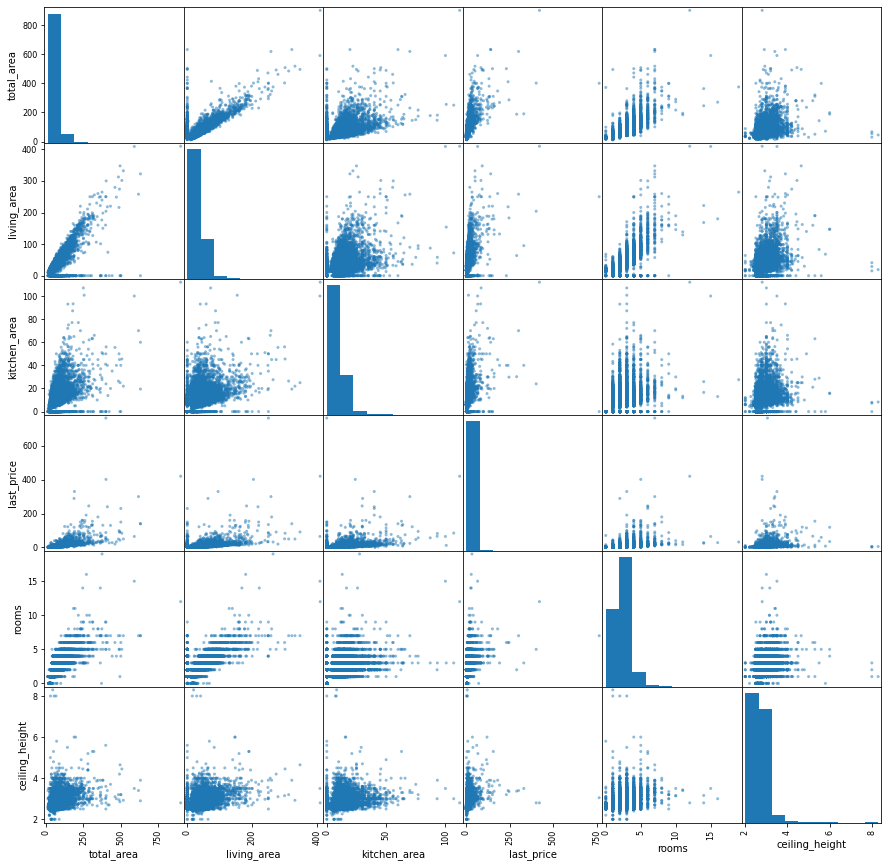

In [136]:
pd.plotting.scatter_matrix(df1, figsize=(15, 15)); #построим матрицу рассеяния

In [137]:
df1.corr()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
total_area,1.000000,0.791720,0.514270,0.653675,0.758344,0.501449
living_area,0.791720,1.000000,0.461090,0.490706,0.744691,0.420980
kitchen_area,0.514270,0.461090,1.000000,0.386444,0.256087,0.338637
last_price,0.653675,0.490706,0.386444,1.000000,0.363343,0.348817
rooms,0.758344,0.744691,0.256087,0.363343,1.000000,0.335709
ceiling_height,0.501449,0.420980,0.338637,0.348817,0.335709,1.000000


Из диаграммы разброса total_area/living_area видна прямая зависимость. Также между этими столбцами наблюдается наибольшая зависимость. Но есть определённый кластер данных откуда следует, что у ряда предложений с ростом общей площади жилая площадь не увеличивается и в ряде случаев равна нулю. Вероятно, речь идёт о коммерческой, нежилой недвижимости.  Именно это влияет на  невысокий коэффициент корреляции -  0,79. 
Интересна также другая зависимость last_price/room, где можно было бы предположить четкую линейную связь, но с увеличением количества комнат цена увеличивается непропорционально. Прямой зависимости также не наблюдается в соотношении living_area и rooms. На основании этого можем предположить, что среди объявлений о продаже недвижимости нередки предложения больших площадей с маленькими комнатами. Под это описание подходят старые коммунальные квартиры, где  высота потолков также не связана со стоимостью, а в некоторых случаях это может работать обратно пропорционально. 

### Изучение времени продажи квартиры. Построение гистограммы. Расчёт среднего и медианы
<a name="шаг-4-2"></a>

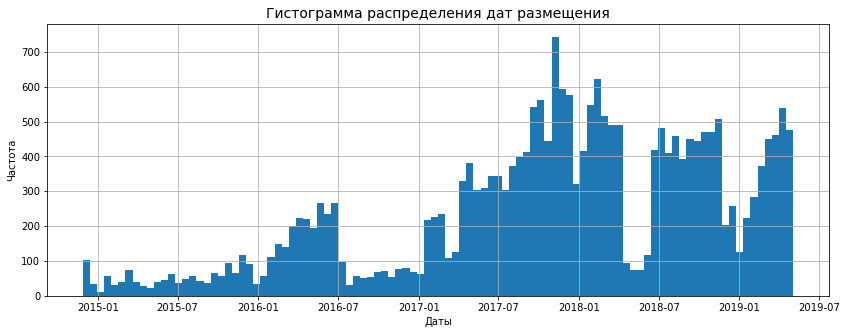

In [138]:
plt.figure(figsize = (14, 5))
df['first_day_exposition'].hist(bins = 100)
plt.title('Гистограмма распределения дат размещения', fontsize = 14)
plt.ylabel('Частота')
plt.xlabel('Даты');

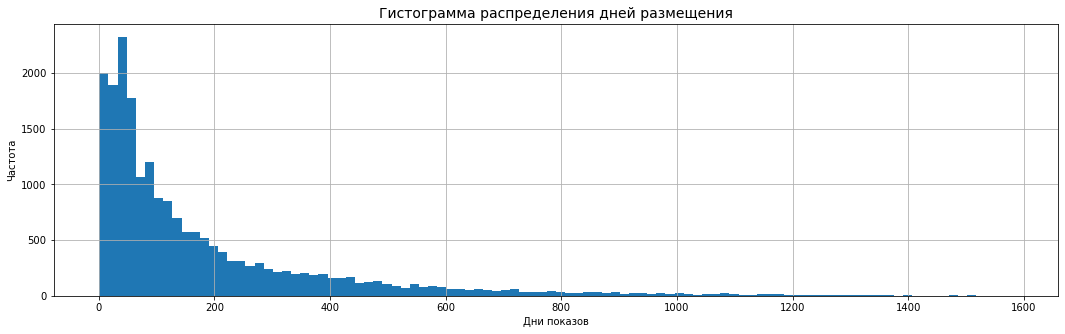

In [139]:
plt.figure(figsize = (18, 5))
df['days_exposition'].hist(bins = 100)
plt.title('Гистограмма распределения дней размещения', fontsize = 14)
plt.ylabel('Частота')
plt.xlabel('Дни показов');

In [140]:
mediane = df['days_exposition'].median() #расчитаем медианное значение количества дней размещения

In [141]:
mediane

95.0

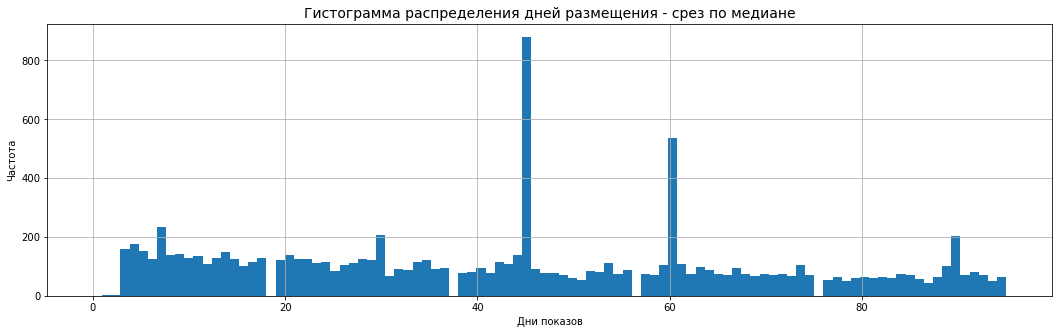

In [142]:
plt.figure(figsize = (18, 5))
df['days_exposition'].hist(bins = 100, range=(0, mediane)) #ограничиваем гистограмму медианным значением
plt.title('Гистограмма распределения дней размещения - срез по медиане', fontsize = 14)
plt.ylabel('Частота')
plt.xlabel('Дни показов');

С высокой долей вероятности недвижимость продаётся в первые 95 дней размещения.

Посмотрим, зависит ли скорость продажи от дней недели в которые были размещены объявления

In [143]:
df2=df[['days_exposition', 'day_of_week', 'month']]

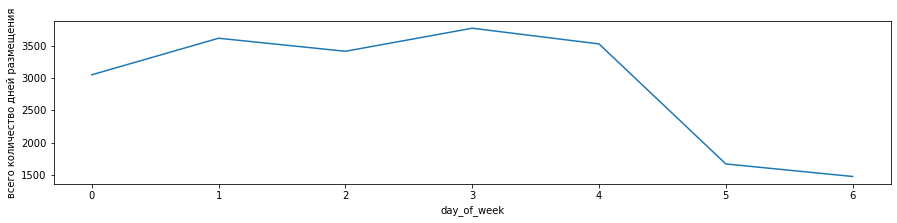

In [144]:
df2.groupby('day_of_week')['days_exposition'].count().plot(figsize=(15,3)).set_ylabel('всего количество дней размещения');

График показывает, что количество дней в течение которых объявление будет показано (до момента продажи) зависит от дня недели размещения. Объявления, которые были размещены в субботу и воскресенье продаются быстрее. Размещение в понедельник снижает шансы продать быстрее. 
Посмотрим, влияет ли месяц размещения на продажи:

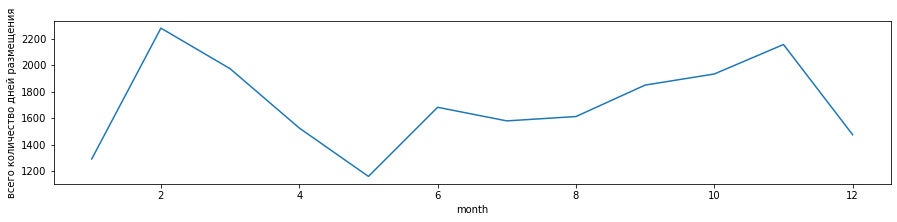

In [145]:
df2.groupby('month')['days_exposition'].count().plot(figsize=(15,3)).set_ylabel('всего количество дней размещения');

Размещение объявлений в январе, мае и декабре совпадает с наименьшим количеством дней в течение которых недвижимость продаётся. Показатели мая могут быть обусловлены большим количеством желающих приобрести недвижимость для будущих студентов петербургских ВУЗов.

### Факторы, влияющие на стоимость квартиры <a name="шаг-4-4"></a> 

Создадим список с перечнем всех факторов, которые могут влиять на стоимость недвижимости:

In [146]:
list_of_factors = ['total_area', 'kitchen_area', 'living_area', 'rooms', 'ceiling_height', 'floor', 'citycenters_nearest', 'parks_around3000', 'ponds_around3000']

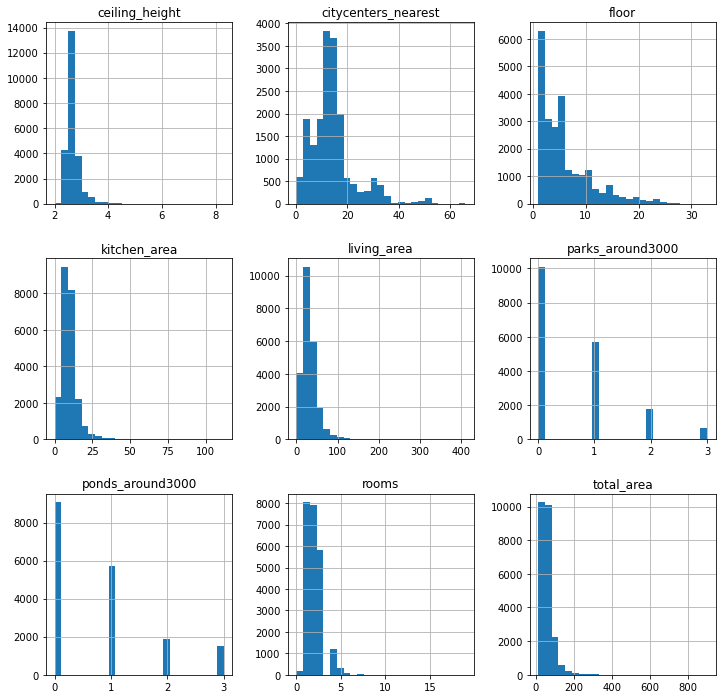

In [147]:
df[list_of_factors].hist(bins=25, figsize=(12, 12));

Рассмотрим более детально влияние total_area на стомость 

In [148]:
df['total_area'].corr(df['last_price']) #зависимость общей площади от итоговой стоимости

0.6536750579657236

In [149]:
df['area_class'] = pd.cut(df['total_area'],20) #разделяем площадь на равные отрезки
pivot_price = df.pivot_table(index=['area_class'], values='last_price', aggfunc='median') #берём медианные значения
pivot_price.columns = ['price_median']
pivot_price['price_median'].map('{:.1f}'.format)


area_class
(11.112, 56.4]      3.8
(56.4, 100.8]       6.5
(100.8, 145.2]     13.5
(145.2, 189.6]     21.0
(189.6, 234.0]     25.0
(234.0, 278.4]     31.5
(278.4, 322.8]     40.3
(322.8, 367.2]     35.5
(367.2, 411.6]     63.9
(411.6, 456.0]     36.9
(456.0, 500.4]     91.1
(500.4, 544.8]     67.0
(589.2, 633.6]    140.0
(855.6, 900.0]    420.0
Name: price_median, dtype: object

Корреляция не близка к 1 поскольку существуют проседающие значения стоимости по некоторым помещениям с большой площадью (в интервале 411-456 кв.м). Предполагается, что именно коммунальные квартиры негативно влияют на общую стоимость. Проверим распределение на параметре удаленности от центра:

In [150]:
pivot_price = df.pivot_table(index=['distfnce_from_center', 'area_class'], values='last_price', aggfunc='median') #берём медианные значения
pivot_price.columns = ['price_median']
pivot_price['price_median'].map('{:.1f}'.format)


distfnce_from_center  area_class    
0 - 3 км              (11.112, 56.4]      2.5
                      (56.4, 100.8]       4.3
                      (100.8, 145.2]     11.3
                      (145.2, 189.6]     17.0
                      (189.6, 234.0]     34.0
                      (234.0, 278.4]     65.0
                      (278.4, 322.8]     63.4
                      (322.8, 367.2]     65.0
                      (367.2, 411.6]    244.7
                      (411.6, 456.0]    130.0
                      (456.0, 500.4]     50.0
                      (500.4, 544.8]     50.0
3 - 6 км              (11.112, 56.4]      5.8
                      (56.4, 100.8]       8.7
                      (100.8, 145.2]     13.5
                      (145.2, 189.6]     21.0
                      (189.6, 234.0]     25.0
                      (234.0, 278.4]     31.0
                      (278.4, 322.8]     41.7
                      (322.8, 367.2]     69.5
                      (367.2, 411.6]     91

Здесь мы видим, что в интервалах 456 -544 от 0 до 3 км от центра и   411-456 кв.м для 3 - 6 км радиуса происходит значительное снижение медианной стоимости. 
Гипотеза с коммуналками подтвердилась. 
Если не учитывать этот факт, зависимость стоимости недвижимости от общей площади будет более чёткой.

Рассмотрим влияние этажа на стоимость квартиры.

In [151]:
df['floor'].corr(df['last_price'])

0.026575643284470794

Как видим, на первый взгляд корреляции нет. Но изучим более подробно. Предположим, что, например, верхние этажи будут продаваться в зависимости от расположения дома на карте города.

In [152]:
pivot_price = df.pivot_table(index=['distfnce_from_center', 'floor_options'], values='last_price', aggfunc='median') #берём медианные значения
pivot_price.columns = ['floor_price_median']
pivot_price['floor_price_median'].map('{:.1f} млн.'.format)

distfnce_from_center  floor_options
0 - 3 км              другой           3.2 млн.
                      первый           2.5 млн.
                      последний        2.6 млн.
3 - 6 км              другой           9.5 млн.
                      первый           6.6 млн.
                      последний        9.9 млн.
6 - 12 км             другой           5.8 млн.
                      первый           4.8 млн.
                      последний        5.2 млн.
более 12 км           другой           4.8 млн.
                      первый           4.2 млн.
                      последний        4.4 млн.
Name: floor_price_median, dtype: object

Этажность влияет на стоимость в зависимости от района расположения квартиры:
- в центре первые и последние этажи продаются несколько дешевле, чем средние. Жить на первых этажах шумно и пыльно, последние традиционно считаются территорией протекающих крыш старого фонда, хотя такая проблема в настоящее время во многом решена.
- самое дорогое жильё расположено в радиусе от 3 до 6 км от центра и здесь первые этажи наиболее дёшевы. Последние этажи здесь дороже всего. Это является следствием того, что данная территория застраивается новыми высотными домами и именно последние этажи привлекательны благодаря своему великолепному виду на Петербург и отсутствию проблем с протечками.  
- недвижимость предлагаемая в большем удалении от центра чаще всего представлена высотками, где наиболее комфортны для жизни средние этажи.

### Выбор 10 населённых пунктов с наибольшим числом объявлений <a name="шаг-4-5"></a> 

In [153]:
df['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Список неоднороден, поэтому используем лемматизацию 

In [154]:
df.dropna(subset=['locality_name'], inplace=True) #прежде исключим незаполненные строки

In [ ]:
from pymystem3 import Mystem
m = Mystem()

def lemmas(locality_name):
    lemmas_list = ' '.join(m.lemmatize(locality_name))
    return lemmas_list

df['lemma_locality_name'] = df['locality_name'].apply(lemmas).values.tolist()

In [ ]:
from collections import Counter
lemma_locality_name = df['locality_name'].values.tolist()
common_list = Counter(lemma_locality_name).most_common(10)

In [ ]:
lemma_locality_name

In [ ]:
common_list #смотрим, что является наиболее популярным

In [ ]:
df3  = pd.DataFrame(lemma_locality_name) #создаём новый датафрейм для анализа

In [ ]:
df['lemma_locality_name']=df3[0] #присоединяем полученные данные к базовому датафрейму

Определяем медианные значения цен за объект для выбранного списка городов:

In [ ]:
pivot_city = df.pivot_table(index='lemma_locality_name', values='last_price', aggfunc='median').query('("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг") in lemma_locality_name')
pivot_city.columns = ['localname']
pivot_city['localname'].map('{:.3f} млн.'.format)

In [ ]:
pivot_city['localname'].plot(y='lemma_locality_name', figsize=(12,5), kind='bar')
plt.title('Медианная цена за объект недвижимости, млн.', fontsize = 15)
plt.ylabel('')
plt.xlabel('');

Медианные цены практически равны - они варьируются в пределах 4.5 млн.  Максимальная медианная цена установлена в Кудрово, минимальная - в Гатчине. В течение последних 10 лет жители Санкт-Петербуга стремятся покупать недвижимость в пригородных районах, что, соответственно повлияло на рост цен на недвижимость в Ленобласти. 

### Вывод
- Предложения недвижимости разнообразны. Нет чёткой прямой зависимости стоимости от площади, комнатности и высоты потолков. 
- С высокой долей вероятности недвижимость продаётся в первые 95 дней размещения.
- Объявления, которые были размещены в субботу и воскресенье продаются быстрее.
- Размещение объявлений в январе, мае и декабре совпадает с наименьшим количеством дней в течение которых недвижимость продаётся.
- Зависимость стоимости недвижимости от площади прямо пропорциональна без учёта предложений коммунальных квартир, часть из которых продаётся по относительно низким ценам.
- Этаж квартиры влияет на стоимость в зависимости от расположения относительно центра города.
- Стоимость недвижимости в Ленобласти не уступает объектам в Санкт-Петербурге. 


## Общие выводы <a name="шаг-5"></a>

Полученные данные включали в себя 22 колонки и 23699 строк. Требовалась замена типов данных  в first_day_exposition с object в datatype, замена  с float на integer в столбцах floors_total и balcony. Для работы наименованиями населенных пунктов была проведена лемматизация  и выбраны наиболее часто упоминаемые места.
В полученных данных большое количество пропущенных значений, часть из которых была заполнена на основе близких по смыслу (этажность и этаж) или  коррелирующих значений.
Были устранены экстремальные значения или аномальные значения, не соответствующие реальности: 5 балконов для помещений 25 кв.м.,  высота потолка более 10 метров или менее 1 метра. Также были заменены значения для этажности, превышающие 42 этажа. Такая градация была сделана на основе данных по высоткам города: самыми высокими зданиями Санкт-Петербурга являются Лахта-центр (88 этажей), ЖК Александр Невский - 37 этажей БЦ Лидер тауэр - 42 этажа, последнее относится к нежилой недвижимости. Однако Лахта еще не запущена в эксплуатацию и продажи помещений в исследуемом периоде не велось. 
Для упрощения процесса цена была переведена в миллионы, а расстояния в метрах были конвертированы в километры. Расстояниям от центра были присвоены категории. Категории также были присвоены этажам.

Предложения недвижимости разнообразны. Нет чёткой прямой зависимости стоимости от площади, комнатности и высоты потолков. 
Анализ показал, что на стоимость недвижимости в большей степени всё-таки  влияет площадь, здесь наблюдается прямая зависимость и максимальная корреляция по отношению к другим показателям. Зависимость может быть еще сильнее если устранить в анализе фактор присутствия коммунальных квартир среди объектов: в большинстве случаев эта недвижимость обладает большой площадью, большим количеством комнат, но низкой стоимостью за один квадратный метр. 

На стоимость также влияет этаж, но  в зависимости от района расположения квартиры:
- в центре первые и последние этажи продаются несколько дешевле, чем средние. Жить на первых этажах шумно и пыльно, последние традиционно считаются территорией протекающих крыш старого фонда, хотя такая проблема в настоящее время во многом решена.
- самое дорогое жильё расположено в радиусе от 3 до 6 км от центра и здесь первые этажи наиболее дёшевы. Последние этажи здесь дороже всего. Это является следствием того, что данная территория застраивается новыми высотными домами и именно последние этажи привлекательны благодаря своему великолепному виду на Петербург и отсутствию проблем с протечками.  
- недвижимость, предлагаемая в большем удалении от центра, чаще всего представлена высотками, где наиболее комфортны для жизни средние этажи.


С высокой долей вероятности недвижимость продаётся в первые 95 дней размещения. - Объявления, которые были размещены в субботу и воскресенье продаются быстрее, а размещенные в понедельник продаются значительно дольше.
Размещение объявлений в январе, мае и декабре совпадает с наименьшим количеством дней в течение которых недвижимость продаётся.
 
Стоимость недвижимости в Ленобласти не уступает объектам в Санкт-Петербурге. Причина такого выравнивания является общий тренд по приобретению жителями Санкт-Петербурга жилья  в Ленинградской области.

<div class="alert alert-block alert-success">
<b>Success:</b> Работа выполнена великолепно, выводы можно спокойно вытащить из тетрадки и показывать коллегам - они отражают абсолютно вс найденные в данных инсайды. Код написан хорошо, графики подобраны максимально репрезентативные. Ты молодец)</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

In [ ]:
from matplotlib import pyplot as plt
from math import factorial

n = 5
p = 0.9

distr = []

for k in range(0,n+1):
        choose = factorial(n)/(factorial(k) * factorial(n-k))
        prob = choose * p**k * (1-p)**(n-k) 
        distr.append(prob)

plt.bar(range(0,n+1), distr) 

In [ ]:
1/5
